In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/content/drive/My Drive/Colab Notebooks/Osteoporosis/N'
aug_dir = '/content/drive/My Drive/Colab Notebooks/O/Normal'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)
# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]

    return augmented_images
# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))

        # Perform augmentation
        augmented_images = augment_image(img)

        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")

Augmentation complete.


In [ ]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/content/drive/My Drive/Colab Notebooks/Osteoporosis/O'
aug_dir = '/content/drive/My Drive/Colab Notebooks/O/Osteo'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)
# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]

    return augmented_images
# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))

        # Perform augmentation
        augmented_images = augment_image(img)

        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")

Augmentation complete.


In [ ]:
import os
import pandas as pd

healthy_dirs = [
    r'/content/drive/My Drive/Colab Notebooks/O/Normal'
]


osteoporosis_dirs = [
    r'/content/drive/My Drive/Colab Notebooks/O/Osteo'
]
filepaths = []
labels = []
dict_lists = [healthy_dirs, osteoporosis_dirs]
class_labels = ['Healthy', 'Osteoporosis']

for i, dir_list in enumerate(dict_lists):
    for j in dir_list:
        flist = os.listdir(j)
        for f in flist:
            fpath = os.path.join(j, f)
            filepaths.append(fpath)
            labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
knee_osteoporosis_data = pd.concat([Fseries, Lseries], axis=1)
knee_osteoporosis_df = pd.DataFrame(knee_osteoporosis_data)
print(knee_osteoporosis_df.head())
print(knee_osteoporosis_df["labels"].value_counts())

                                           filepaths   labels
0  /content/drive/My Drive/Colab Notebooks/O/Norm...  Healthy
1  /content/drive/My Drive/Colab Notebooks/O/Norm...  Healthy
2  /content/drive/My Drive/Colab Notebooks/O/Norm...  Healthy
3  /content/drive/My Drive/Colab Notebooks/O/Norm...  Healthy
4  /content/drive/My Drive/Colab Notebooks/O/Norm...  Healthy
labels
Healthy         1860
Osteoporosis    1860
Name: count, dtype: int64


In [ ]:
knee_osteoporosis_df.shape

(3720, 2)

In [ ]:
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

In [ ]:
train_images, test_images = train_test_split(knee_osteoporosis_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(knee_osteoporosis_df, test_size=0.2, random_state=42)

In [ ]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(2976, 2)
(1116, 2)
(744, 2)
(2604, 2)


In [ ]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=4,
                                      shuffle=False            #do not shuffle data
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=4,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=4,
                                    shuffle=False
                                   )

Found 2976 validated image filenames belonging to 2 classes.
Found 1116 validated image filenames belonging to 2 classes.
Found 744 validated image filenames belonging to 2 classes.


In [ ]:
classes=list(train.class_indices.keys())
print (classes)

['Healthy', 'Osteoporosis']


In [ ]:
def show_knee_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

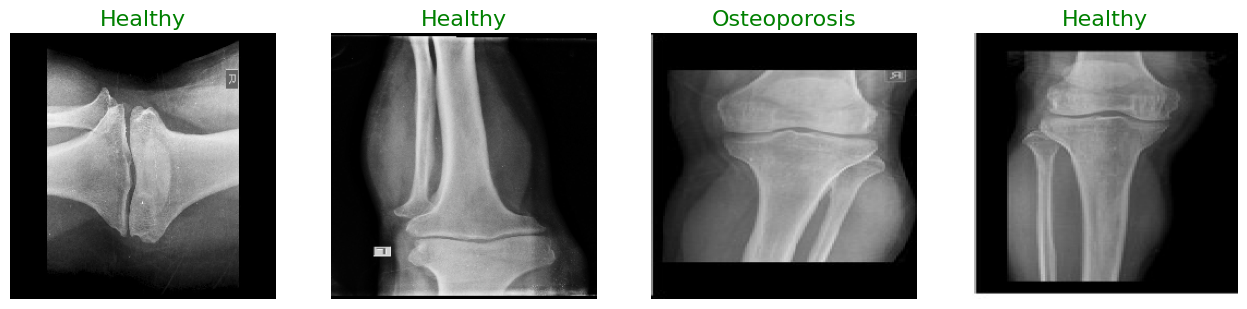

In [ ]:
show_knee_images(train)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 128)       24704     
                                                                 
 batch_normalization (Batch  (None, 73, 73, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 256)       819456    
                                                                 
 batch_normalization_1 (Bat  (None, 73, 73, 256)       1024      
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                        

In [ ]:
history = model.fit(train, epochs=10, validation_data=val, verbose=1)
model.evaluate(test, verbose=1)

Epoch 1/10
744/744 [==============================] - 96s 116ms/step - loss: 1.0402 - accuracy: 0.6048 - val_loss: 0.6212 - val_accuracy: 0.7500
Epoch 2/10
744/744 [==============================] - 71s 95ms/step - loss: 0.6586 - accuracy: 0.6969 - val_loss: 0.4655 - val_accuracy: 0.8011
Epoch 3/10
744/744 [==============================] - 104s 139ms/step - loss: 0.5747 - accuracy: 0.7278 - val_loss: 0.4810 - val_accuracy: 0.7823
Epoch 4/10
744/744 [==============================] - 72s 97ms/step - loss: 0.5107 - accuracy: 0.7671 - val_loss: 0.4538 - val_accuracy: 0.8011
Epoch 5/10
744/744 [==============================] - 71s 96ms/step - loss: 0.4786 - accuracy: 0.7762 - val_loss: 0.4285 - val_accuracy: 0.8011
Epoch 6/10
744/744 [==============================] - 99s 133ms/step - loss: 0.4499 - accuracy: 0.7930 - val_loss: 0.4144 - val_accuracy: 0.8280
Epoch 7/10
744/744 [==============================] - 71s 95ms/step - loss: 0.4024 - accuracy: 0.8243 - val_loss: 0.4286 - val_accur

[0.33567121624946594, 0.8458781242370605]

In [ ]:
history1= model.fit(train, epochs=10, validation_data=val, verbose=1)
model.evaluate(test, verbose=1)

Epoch 1/10
744/744 [==============================] - 70s 94ms/step - loss: 0.2633 - accuracy: 0.8881 - val_loss: 0.3670 - val_accuracy: 0.8656
Epoch 2/10
744/744 [==============================] - 81s 109ms/step - loss: 0.2188 - accuracy: 0.9153 - val_loss: 0.3534 - val_accuracy: 0.8616
Epoch 3/10
744/744 [==============================] - 70s 94ms/step - loss: 0.2030 - accuracy: 0.9147 - val_loss: 0.3781 - val_accuracy: 0.8696
Epoch 4/10
744/744 [==============================] - 71s 95ms/step - loss: 0.1882 - accuracy: 0.9217 - val_loss: 0.3774 - val_accuracy: 0.8683
Epoch 5/10
744/744 [==============================] - 70s 94ms/step - loss: 0.1542 - accuracy: 0.9422 - val_loss: 0.3432 - val_accuracy: 0.8750
Epoch 6/10
744/744 [==============================] - 69s 93ms/step - loss: 0.1490 - accuracy: 0.9422 - val_loss: 0.3613 - val_accuracy: 0.8804
Epoch 7/10
744/744 [==============================] - 69s 93ms/step - loss: 0.1300 - accuracy: 0.9459 - val_loss: 0.3913 - val_accuracy

[0.29307541251182556, 0.9041218757629395]

In [ ]:
history2 = model.fit(train, epochs=10, validation_data=val, verbose=1)
model.evaluate(test, verbose=1)

Epoch 1/10
744/744 [==============================] - 76s 103ms/step - loss: 0.0896 - accuracy: 0.9647 - val_loss: 0.3592 - val_accuracy: 0.8858
Epoch 2/10
744/744 [==============================] - 69s 93ms/step - loss: 0.0767 - accuracy: 0.9721 - val_loss: 0.4263 - val_accuracy: 0.8898
Epoch 3/10
744/744 [==============================] - 69s 93ms/step - loss: 0.0649 - accuracy: 0.9778 - val_loss: 0.4703 - val_accuracy: 0.8804
Epoch 4/10
744/744 [==============================] - 70s 93ms/step - loss: 0.0603 - accuracy: 0.9802 - val_loss: 0.4108 - val_accuracy: 0.8723
Epoch 5/10
744/744 [==============================] - 71s 95ms/step - loss: 0.0565 - accuracy: 0.9808 - val_loss: 0.4579 - val_accuracy: 0.8965
Epoch 6/10
744/744 [==============================] - 69s 93ms/step - loss: 0.0405 - accuracy: 0.9839 - val_loss: 0.4318 - val_accuracy: 0.9032
Epoch 7/10
744/744 [==============================] - 70s 94ms/step - loss: 0.0425 - accuracy: 0.9862 - val_loss: 0.4705 - val_accuracy

[0.40347832441329956, 0.9184587597846985]

In [ ]:
history3 = model.fit(train, epochs=10, validation_data=val, verbose=1)
model.evaluate(test, verbose=1)

Epoch 1/10
744/744 [==============================] - 70s 94ms/step - loss: 0.0284 - accuracy: 0.9903 - val_loss: 0.4496 - val_accuracy: 0.8898
Epoch 2/10
744/744 [==============================] - 71s 95ms/step - loss: 0.0318 - accuracy: 0.9882 - val_loss: 0.4150 - val_accuracy: 0.9046
Epoch 3/10
744/744 [==============================] - 70s 94ms/step - loss: 0.0341 - accuracy: 0.9882 - val_loss: 0.5865 - val_accuracy: 0.8831
Epoch 4/10
744/744 [==============================] - 70s 94ms/step - loss: 0.0291 - accuracy: 0.9926 - val_loss: 0.4864 - val_accuracy: 0.8952
Epoch 5/10
744/744 [==============================] - 70s 94ms/step - loss: 0.0162 - accuracy: 0.9953 - val_loss: 0.4880 - val_accuracy: 0.8925
Epoch 6/10
744/744 [==============================] - 70s 94ms/step - loss: 0.0226 - accuracy: 0.9919 - val_loss: 0.5268 - val_accuracy: 0.8898
Epoch 7/10
744/744 [==============================] - 70s 94ms/step - loss: 0.0239 - accuracy: 0.9926 - val_loss: 0.5313 - val_accuracy:

[0.47462978959083557, 0.9130824208259583]

In [ ]:
history4 = model.fit(train, epochs=10, validation_data=val, verbose=1)
model.evaluate(test, verbose=1)

Epoch 1/10
744/744 [==============================] - 71s 96ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.5806 - val_accuracy: 0.8683
Epoch 2/10
744/744 [==============================] - 71s 95ms/step - loss: 0.0151 - accuracy: 0.9956 - val_loss: 0.5434 - val_accuracy: 0.8978
Epoch 3/10
744/744 [==============================] - 77s 104ms/step - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.5679 - val_accuracy: 0.8925
Epoch 4/10
744/744 [==============================] - 70s 94ms/step - loss: 0.0147 - accuracy: 0.9963 - val_loss: 0.6012 - val_accuracy: 0.8831
Epoch 5/10
744/744 [==============================] - 70s 94ms/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.6829 - val_accuracy: 0.8831
Epoch 6/10
744/744 [==============================] - 78s 104ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.6816 - val_accuracy: 0.8992
Epoch 7/10
744/744 [==============================] - 71s 96ms/step - loss: 0.0079 - accuracy: 0.9987 - val_loss: 0.4761 - val_accurac

[0.4289264976978302, 0.9247311949729919]

In [ ]:
history5 = model.fit(train, epochs=10, validation_data=val, verbose=1)
model.evaluate(test, verbose=1)

Epoch 1/10
744/744 [==============================] - 72s 97ms/step - loss: 7.7197e-04 - accuracy: 1.0000 - val_loss: 0.5998 - val_accuracy: 0.9032
Epoch 2/10
744/744 [==============================] - 70s 94ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.6238 - val_accuracy: 0.9019
Epoch 3/10
744/744 [==============================] - 71s 95ms/step - loss: 0.0042 - accuracy: 0.9997 - val_loss: 0.6092 - val_accuracy: 0.9046
Epoch 4/10
744/744 [==============================] - 70s 95ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.6154 - val_accuracy: 0.9032
Epoch 5/10
744/744 [==============================] - 78s 105ms/step - loss: 5.4687e-04 - accuracy: 1.0000 - val_loss: 0.6086 - val_accuracy: 0.9086
Epoch 6/10
744/744 [==============================] - 70s 95ms/step - loss: 0.0099 - accuracy: 0.9990 - val_loss: 0.6216 - val_accuracy: 0.9113
Epoch 7/10
744/744 [==============================] - 70s 95ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6377 - val_

[0.4811095595359802, 0.9256272315979004]

In [ ]:
history6 = model.fit(train, epochs=10, validation_data=val, verbose=1)
model.evaluate(test, verbose=1)

Epoch 1/10
744/744 [==============================] - 77s 104ms/step - loss: 0.0043 - accuracy: 0.9997 - val_loss: 0.6629 - val_accuracy: 0.9099
Epoch 2/10
744/744 [==============================] - 69s 93ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.6422 - val_accuracy: 0.9019
Epoch 3/10
744/744 [==============================] - 71s 95ms/step - loss: 8.1053e-04 - accuracy: 1.0000 - val_loss: 0.6674 - val_accuracy: 0.9126
Epoch 4/10
744/744 [==============================] - 72s 97ms/step - loss: 8.6759e-04 - accuracy: 0.9997 - val_loss: 0.6756 - val_accuracy: 0.9113
Epoch 5/10
744/744 [==============================] - 70s 94ms/step - loss: 9.2226e-04 - accuracy: 0.9997 - val_loss: 0.6736 - val_accuracy: 0.9086
Epoch 6/10
744/744 [==============================] - 71s 95ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.6638 - val_accuracy: 0.9099
Epoch 7/10
744/744 [==============================] - 71s 96ms/step - loss: 3.5528e-04 - accuracy: 1.0000 - val_loss: 0.654

[0.4945213198661804, 0.9265232682228088]

In [ ]:
history7 = model.fit(train, epochs=10, validation_data=val, verbose=1)
model.evaluate(test, verbose=1)

Epoch 1/10
744/744 [==============================] - 75s 101ms/step - loss: 7.8463e-05 - accuracy: 1.0000 - val_loss: 0.7242 - val_accuracy: 0.9059
Epoch 2/10
744/744 [==============================] - 71s 95ms/step - loss: 1.1979e-04 - accuracy: 1.0000 - val_loss: 0.7325 - val_accuracy: 0.9099
Epoch 3/10
744/744 [==============================] - 78s 105ms/step - loss: 9.2100e-05 - accuracy: 1.0000 - val_loss: 0.7458 - val_accuracy: 0.9086
Epoch 4/10
744/744 [==============================] - 70s 94ms/step - loss: 6.2496e-05 - accuracy: 1.0000 - val_loss: 0.7314 - val_accuracy: 0.9099
Epoch 5/10
744/744 [==============================] - 71s 95ms/step - loss: 4.4294e-04 - accuracy: 1.0000 - val_loss: 0.7407 - val_accuracy: 0.9099
Epoch 6/10
744/744 [==============================] - 72s 96ms/step - loss: 5.4515e-05 - accuracy: 1.0000 - val_loss: 0.7392 - val_accuracy: 0.9113
Epoch 7/10
744/744 [==============================] - 72s 96ms/step - loss: 6.5124e-05 - accuracy: 1.0000 - va

[0.5257917046546936, 0.9292114973068237]

In [ ]:
model.evaluate(test, verbose=1)

In [ ]:
history8 = model.fit(train, epochs=10, validation_data=val, verbose=1)
model.evaluate(test, verbose=1)

Epoch 1/10
744/744 [==============================] - 71s 96ms/step - loss: 1.4030e-04 - accuracy: 1.0000 - val_loss: 0.7405 - val_accuracy: 0.9086
Epoch 2/10
744/744 [==============================] - 73s 98ms/step - loss: 8.1545e-05 - accuracy: 1.0000 - val_loss: 0.7499 - val_accuracy: 0.9086
Epoch 3/10
744/744 [==============================] - 72s 96ms/step - loss: 8.7686e-05 - accuracy: 1.0000 - val_loss: 0.7425 - val_accuracy: 0.9086
Epoch 4/10
744/744 [==============================] - 80s 108ms/step - loss: 8.3601e-05 - accuracy: 1.0000 - val_loss: 0.7404 - val_accuracy: 0.9086
Epoch 5/10
744/744 [==============================] - 72s 96ms/step - loss: 5.9074e-05 - accuracy: 1.0000 - val_loss: 0.7359 - val_accuracy: 0.9099
Epoch 6/10
744/744 [==============================] - 71s 95ms/step - loss: 1.2966e-04 - accuracy: 1.0000 - val_loss: 0.7540 - val_accuracy: 0.9099
Epoch 7/10
744/744 [==============================] - 71s 95ms/step - loss: 4.7827e-05 - accuracy: 1.0000 - val

[0.5473066568374634, 0.9292114973068237]

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Model/5Osteoporosis_Model_binary.h5")

In [ ]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

279/279 [==============================] - 20s 70ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

              precision    recall  f1-score   support

     Healthy       0.95      0.91      0.93       570
Osteoporosis       0.91      0.95      0.93       546

    accuracy                           0.93      1116
   macro avg       0.93      0.93      0.93      1116
weighted avg       0.93      0.93      0.93      1116

Accuracy of the Model: 92.9%


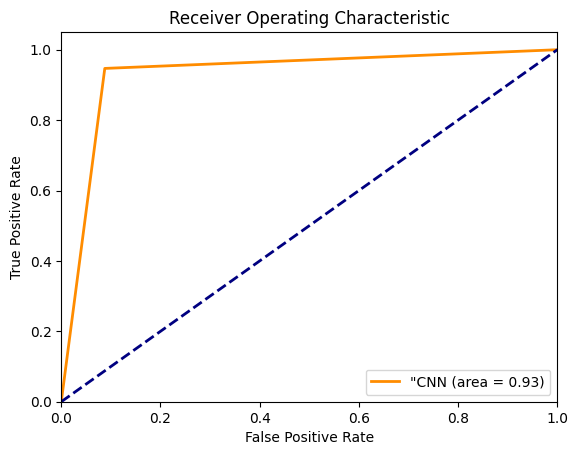

vgg16 roc acc: 0.9295835743204163


In [ ]:
# Create a dictionary to map string labels to integers
label_mapping = {'Healthy': 0, 'Osteoporosis': 1}

# Convert the string labels in y_test to integers
y_test_numeric = [label_mapping[label] for label in y_test]
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder on the unique labels in y_test
le.fit(y_test.unique())

# Transform the string labels in y_test to integers
y_test_numeric = le.transform(y_test)
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test_numeric, pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test_numeric, pred)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='"CNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("vgg16 roc acc:", roc_auc)

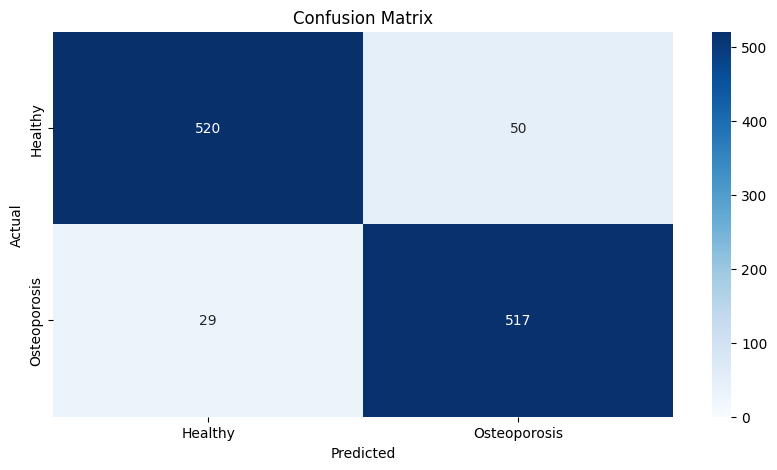

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_labels = ['Healthy','Osteoporosis']

cm = confusion_matrix(y_test, pred2)

plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

plt.xticks(ticks=[0.5, 1.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()

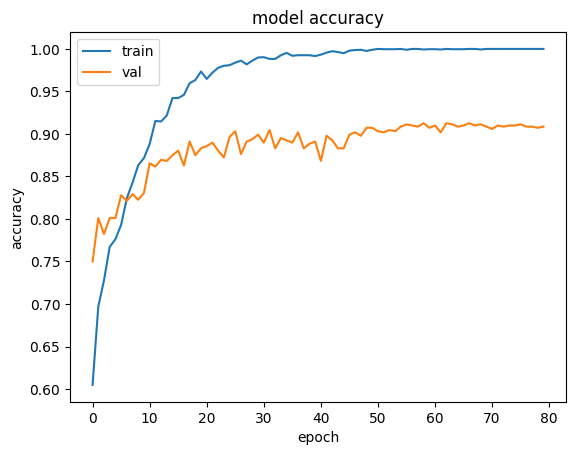

In [ ]:
plt.plot(history.history['accuracy'] +
         history1.history['accuracy'] +
         history2.history['accuracy'] +
         history3.history['accuracy']+
         history4.history['accuracy']+
         history5.history['accuracy']+
         history6.history['accuracy']+
          history7.history['accuracy'])
plt.plot(history.history['val_accuracy'] +
         history1.history['val_accuracy'] +
         history2.history['val_accuracy'] +
         history3.history['val_accuracy']+
         history4.history['val_accuracy'] +
         history5.history['val_accuracy'] +
         history6.history['val_accuracy'] +
         history7.history['val_accuracy']
          )
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

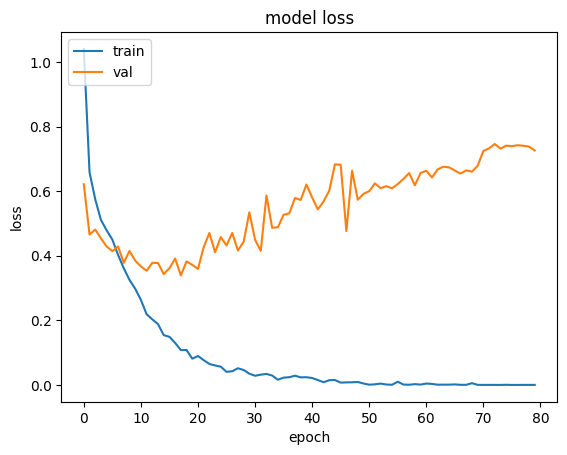

In [ ]:
plt.plot(history.history['loss'] +
         history1.history['loss'] +
         history2.history['loss'] +
         history3.history['loss']+
         history4.history['loss'] +
         history5.history['loss'] +
         history6.history['loss'] +
         history7.history['loss'] )
plt.plot(history.history['val_loss'] +
         history1.history['val_loss'] +
         history2.history['val_loss'] +
         history3.history['val_loss']+
         history4.history['val_loss'] +
          history5.history['val_loss'] +
          history6.history['val_loss'] +
          history7.history['val_loss'] )
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##CNN PREDICT


In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_cnn=load_model('/content/drive/MyDrive/Colab Notebooks/Model/5Osteoporosis_Model_binary.h5')

1/1 [==============================] - 1s 782ms/step
Healthy


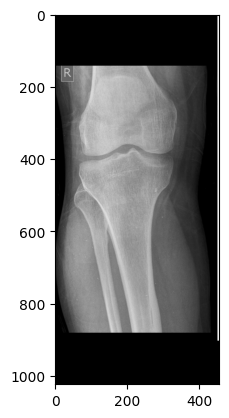

In [ ]:
classes=list(train.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

img_url='/content/drive/MyDrive/Colab Notebooks/Osteoporosis/N/N (1).JPEG'
result_cnn = model_cnn.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_cnn,axis=1)
print(classes[classresult[0]])